# 고령자는 왜 이탈하는가?

### 초기 데이터 세팅

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 기본 테마 설정
# https://coldbrown.co.kr/2023/07/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%8B%A4%EC%A0%84%ED%8E%B8-08-seaborn-sns-set%EC%9D%84-%ED%86%B5%ED%95%B4-%EC%8A%A4%ED%83%80%EC%9D%BC-%EC%84%A4%EC%A0%95%ED%95%98%EA%B8%B0/
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False


# 복잡한 통계 처리를 위한 라이브러리
from scipy import stats

In [2]:
## 데이터프레임을 넣고 column별 특성 및 결측값, 고유값들을 확인하는 함수를 작성해본다.
## 필수는 아니지만 전체적인 흐름을 파악하기 쉬워진다.

def resumetable(df):
  print(f'데이터셋 크기: {df.shape}')                                # 데이터프레임의 전체 크기(행, 열) 출력

  summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])         # 각 피처의 데이터 타입을 가져와 데이터프레임으로 생성
  summary = summary.reset_index()                                    # 인덱스를 초기화하여 컬럼으로 변환
  summary = summary.rename(columns={'index':'피처'})                 # 'index' 컬럼명을 '피처'로 변경

  summary['결측값 개수'] = df.isnull().sum().values                 # 각 피처의 결측값(null) 개수 계산
  summary['고유값 개수'] = df.nunique().values                      # 각 피처의 고유값 개수 계산

  summary['첫 번째 값'] = df.iloc[0].values                          # 각 피처의 첫 번째 샘플 값
  summary['두 번째 값'] = df.iloc[1].values                          # 각 피처의 두 번째 샘플 값
  summary['세 번째 값'] = df.iloc[2].values                          # 각 피처의 세 번째 샘플 값

  return summary                                                     # 요약 테이블 반환

In [3]:
total = pd.read_csv('data/total_final.csv')
total

,고객ID,위도,경도,성별,고령자여부,배우자여부,부양가족여부,가입개월수,전화서비스가입여부,복수회선여부,...,가입혜택,장거리통화요금,월평균다운로드용량(GB),프리미엄기술지원여부,음악스트리밍이용여부,무제한데이터이용여부,총환불액,총초과데이터요금,총장거리통화요금,총납부금
0,0002-ORFBO,34.827662,-118.999073,False,False,True,False,9,True,False,...,No,42.39,16,True,False,True,0.00,0,381.51,974.81
1,0003-MKNFE,34.162515,-118.203869,True,False,False,False,9,True,True,...,No,10.69,10,False,True,False,38.33,10,96.21,610.28
2,0004-TLHLJ,33.645672,-117.922613,True,False,False,False,4,True,False,...,Offer E,33.65,30,False,False,True,0.00,0,134.60,415.45
3,0011-IGKFF,38.014457,-122.115432,True,True,True,False,13,True,False,...,Offer D,27.82,4,False,False,True,0.00,0,361.66,1599.51
4,0013-EXCHZ,34.227846,-119.079903,False,True,True,False,3,True,False,...,No,7.38,11,True,False,True,0.00,0,22.14,289.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,32.759327,-116.997260,False,False,False,False,13,True,False,...,Offer D,46.68,59,True,True,True,0.00,0,606.84,1349.74
7039,9992-RRAMN,37.734971,-120.954271,True,False,True,False,22,True,True,...,Offer D,16.20,17,False,True,True,0.00,0,356.40,2230.10
7040,9992-UJOEL,39.108252,-123.645121,True,False,False,False,2,True,False,...,Offer E,18.62,51,False,False,True,0.00,0,37.24,129.99
7041,9993-LHIEB,33.001813,-117.263628,True,False,True,False,67,True,False,...,Offer A,2.12,58,True,True,True,0.00,0,142.04,4769.69


In [4]:
resumetable(total)

데이터셋 크기: (7043, 43)


,피처,데이터 타입,결측값 개수,고유값 개수,첫 번째 값,두 번째 값,세 번째 값
0,고객ID,object,0,7043,0002-ORFBO,0003-MKNFE,0004-TLHLJ
1,위도,float64,0,1652,34.827662,34.162515,33.645672
2,경도,float64,0,1651,-118.999073,-118.203869,-117.922613
3,성별,bool,0,2,False,True,True
4,고령자여부,bool,0,2,False,False,False
5,배우자여부,bool,0,2,True,False,False
6,부양가족여부,bool,0,2,False,False,False
7,가입개월수,int64,0,73,9,9,4
8,전화서비스가입여부,bool,0,2,True,True,True
9,복수회선여부,bool,0,2,False,True,False


## 히트맵

### 수치형 (고령자여부는 bool)

In [5]:
numeric_df = total.select_dtypes(include=['number', 'bool'])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

                     위도        경도        성별     고령자여부     배우자여부    부양가족여부  \
위도             1.000000 -0.876779  0.008592 -0.010428 -0.007996  0.017550   
경도            -0.876779  1.000000 -0.009824  0.008812  0.008032 -0.013813   
성별             0.008592 -0.009824  1.000000 -0.001874 -0.001808  0.005229   
고령자여부         -0.010428  0.008812 -0.001874  1.000000  0.016479 -0.174396   
배우자여부         -0.007996  0.008032 -0.001808  0.016479  1.000000  0.363430   
부양가족여부         0.017550 -0.013813  0.005229 -0.174396  0.363430  1.000000   
가입개월수         -0.001631 -0.001678  0.005106  0.016567  0.379697  0.131376   
전화서비스가입여부     -0.013491  0.014069 -0.006488  0.008576  0.017706  0.000625   
복수회선여부        -0.024877  0.023059 -0.008414  0.142948  0.142057 -0.027510   
온라인보안서비스여부    -0.000082 -0.005924 -0.017021 -0.038653  0.143106  0.050353   
온라인백업서비스여부    -0.003405  0.012539 -0.013773  0.066572  0.141498  0.003457   
기기보호서비스여부     -0.000277  0.004478 -0.002105  0.059428  0.153786 -0.022343   

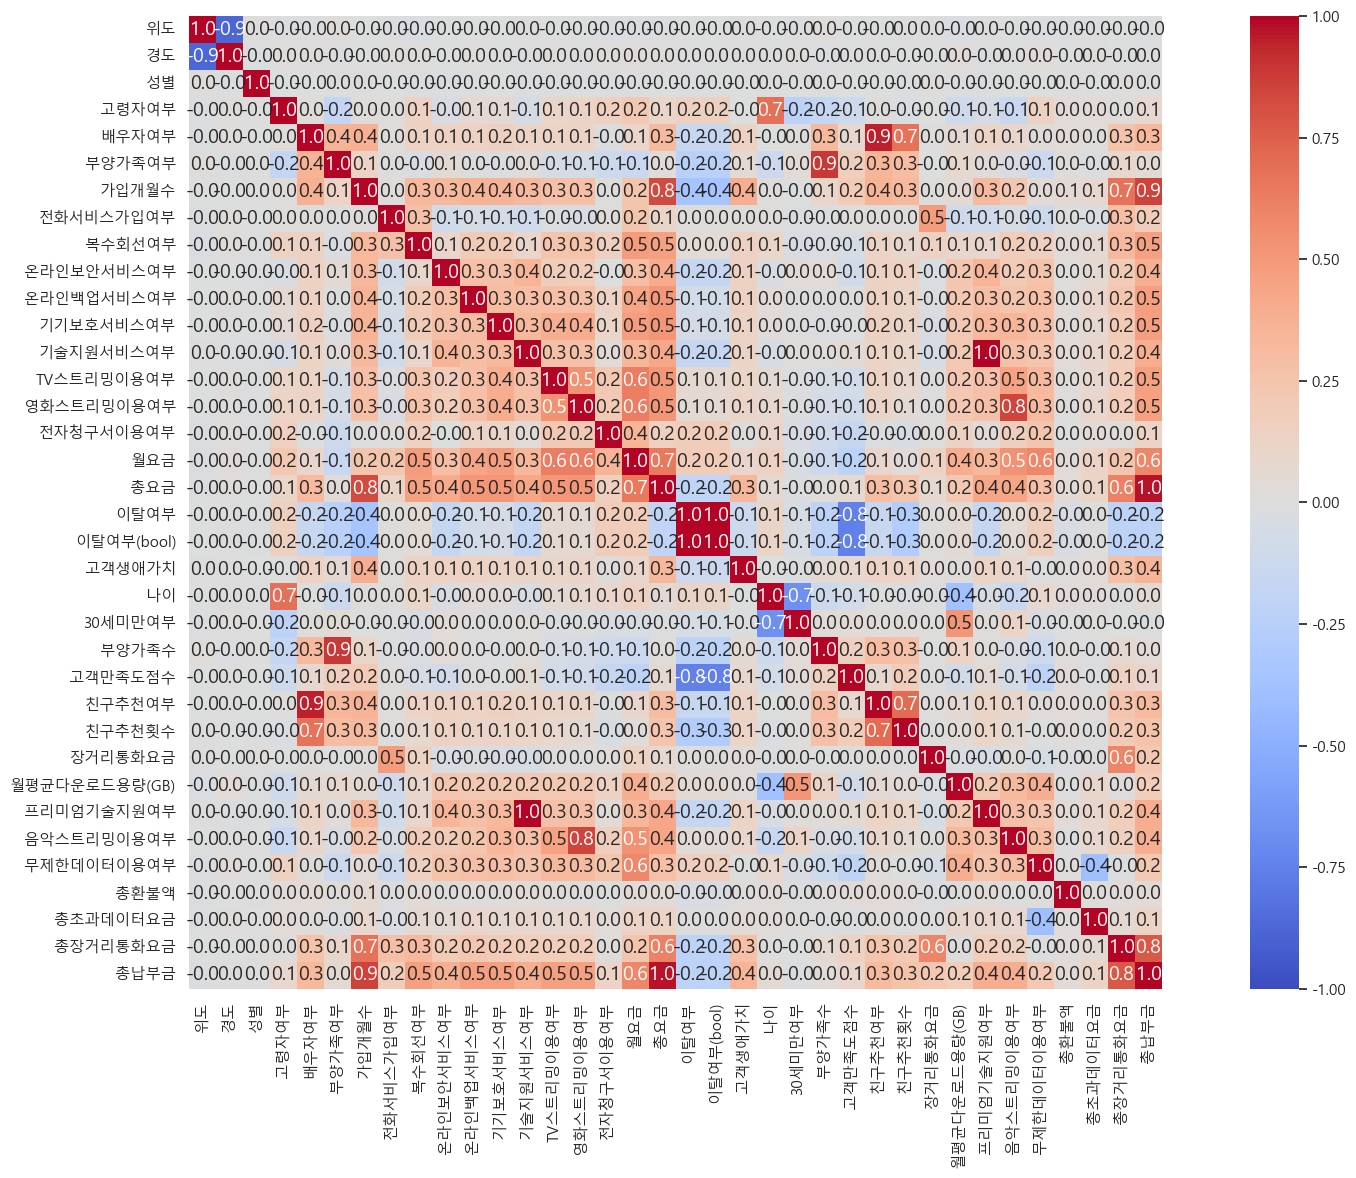

In [6]:
plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap='coolwarm', square=True, vmin=-1, vmax=1)
plt.tight_layout()
plt.show()

- 고령자여부와 큰 상관 거의 없음
- 의미있을 만한 건 **월요금, 전자청구서이용여부** 정도...

### 범주형 + 고령자여부

In [8]:
categorical_df = total.select_dtypes(include='object')
categorical_df.drop(columns = ['고객ID', '이탈이유'], inplace = True)
categorical_df = pd.get_dummies(categorical_df)
categorical_df['고령자여부'] = tel['고령자여부']
categorical_df

NameError: name 'tel' is not defined

In [ ]:
correlation_matrix2 = categorical_df.corr()
print(correlation_matrix2)

In [ ]:
plt.figure(figsize=(24, 16))
sns.heatmap(correlation_matrix2, annot=True, fmt=".1f", cmap='coolwarm', square=True, vmin=-1, vmax=1)
plt.tight_layout()
plt.show()